In [1]:
#Importing the libraries
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
#Setting the data path
data_train_path = 'D:/CNNdataset/Road_signs/DATA'
data_test_path = 'D:/CNNdataset//Road_signs/TEST'
data_val_path = 'D:/CNNdataset//Road_signs/VALIDATION'

In [3]:
#Displaying the data path
print(data_train_path)
print(data_test_path)
print(data_val_path)

D:/CNNdataset/Road_signs/DATA
D:/CNNdataset//Road_signs/TEST
D:/CNNdataset//Road_signs/VALIDATION


In [4]:
#Setting the height and width of the images
img_width = 180
img_height =180

In [5]:
#Loading the training data
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 743 files belonging to 30 classes.


In [43]:
#Displaying the types of classes
sign_type = data_train.class_names
sign_type

['0',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9']

In [8]:
#Loading test data
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 280 files belonging to 30 classes.


In [9]:
#Loading validation data
data_validation = tf.keras.utils.image_dataset_from_directory(
data_val_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 287 files belonging to 30 classes.


In [10]:
# Class Names
print(f"Class names: {data_train.class_names}")

Class names: ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '4', '5', '6', '7', '8', '9']


In [11]:
# Dataset sizes
train_size = len(data_train)
test_size = len(data_test)
val_size = len(data_validation)

print(f"Training dataset size: {train_size}")
print(f"Test dataset size: {test_size}")
print(f"Validation dataset size: {val_size}")

Training dataset size: 24
Test dataset size: 9
Validation dataset size: 9


In [12]:
#Image shape 
sample_batch = next(iter(data_train))
image_shape = sample_batch[0].shape
print(f"Image shape (Height x Width x Channels): {image_shape}")

Image shape (Height x Width x Channels): (32, 180, 180, 3)


D:\Newfolder\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


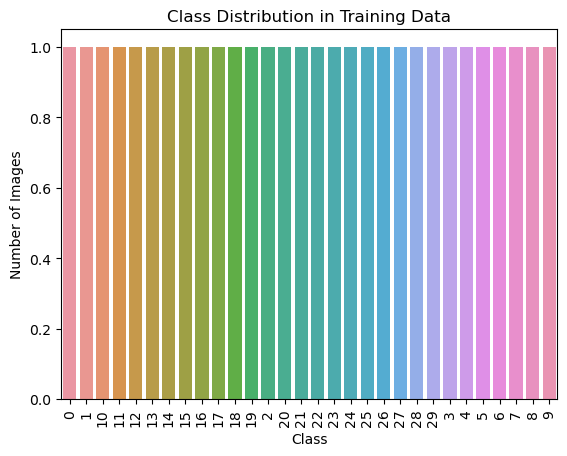

In [15]:
# Class distribution in the training set
train_class_counts = np.bincount(data_train.class_names)
sns.barplot(x=data_train.class_names, y=train_class_counts)
plt.xticks(rotation=90)
plt.title("Class Distribution in Training Data")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()

D:\Newfolder\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


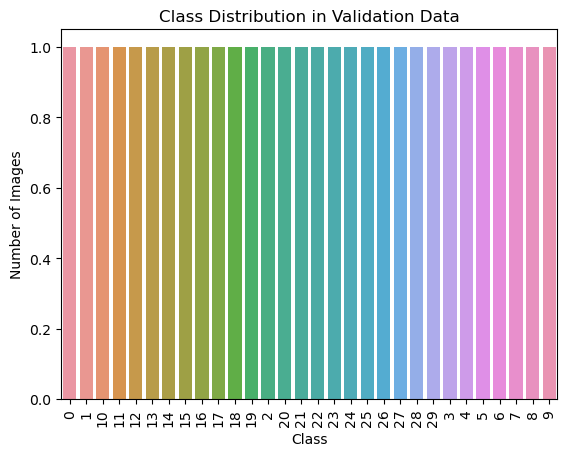

In [16]:
# Class distribution for validation datasets
val_class_counts = np.bincount(data_validation.class_names)
sns.barplot(x=data_validation.class_names, y=val_class_counts)
plt.xticks(rotation=90)
plt.title("Class Distribution in Validation Data")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()

D:\Newfolder\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


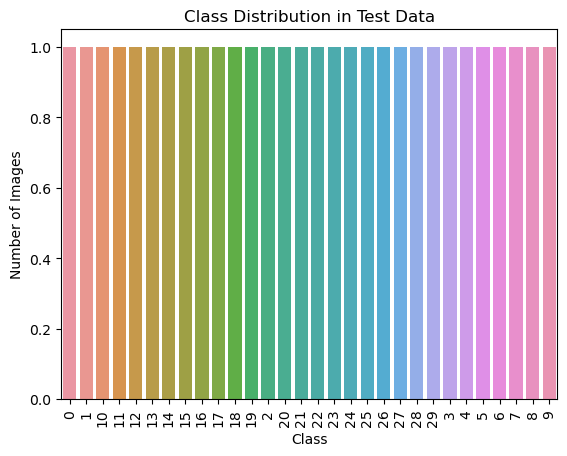

In [17]:
# Class distribution for test datasets
test_class_counts = np.bincount(data_test.class_names)
sns.barplot(x=data_test.class_names, y=test_class_counts)
plt.xticks(rotation=90)
plt.title("Class Distribution in Test Data")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()

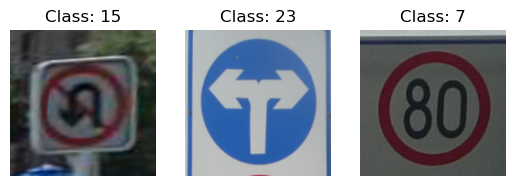

In [19]:
# Function to display random images from the dataset
def display_images_from_dataset(dataset, num_images=3):
   
    for images, labels in dataset.take(1):  
        for i in range(num_images):
            plt.subplot(1, num_images, i+1)  
            plt.imshow(images[i].numpy().astype("uint8"))  # Display the image
            plt.title(f"Class: {dataset.class_names[labels[i]]}")  # Display the class name as title
            plt.axis('off') 
    plt.show()  

# Call the function to display 3 random images
display_images_from_dataset(data_train, num_images=3)

In [20]:
#Importing the CNN layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [21]:
#Implementation of CNN
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(sign_type))
                  
])

In [22]:
#Compilation of the model
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [23]:
#Setting the epoch size and fitting the model
epochs_size = 15
history = model.fit(data_train, validation_data=data_validation, epochs=epochs_size)

Epoch 1/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.0972 - loss: 4.2677 - val_accuracy: 0.6202 - val_loss: 2.0700
Epoch 2/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 14s 593ms/step - accuracy: 0.6175 - loss: 1.7621 - val_accuracy: 0.8362 - val_loss: 0.7571
Epoch 3/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 16s 676ms/step - accuracy: 0.8294 - loss: 0.6542 - val_accuracy: 0.9547 - val_loss: 0.1548
Epoch 4/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 637ms/step - accuracy: 0.9564 - loss: 0.1934 - val_accuracy: 1.0000 - val_loss: 0.0303
Epoch 5/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 21s 645ms/step - accuracy: 0.9930 - loss: 0.0541 - val_accuracy: 1.0000 - val_loss: 0.0228
Epoch 6/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 16s 668ms/step - accuracy: 0.9916 - loss: 0.0402 - val_accuracy: 0.9861 - val_loss: 0.0374
Epoch 7/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 16s 477ms/step - accuracy: 0.9801 - loss: 0.0481 - val_accuracy: 1.0000 - val_loss: 0.0105
Epoch 8/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 478ms/step - accuracy: 1.0000 - loss: 0.0141 - val_accurac

In [27]:
# Display the accuracy of the model on test data
train_accuracy = model.evaluate(data_train)
print(f"Train Accuracy: {train_accuracy[1]:.4f}")  

24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 229ms/step - accuracy: 1.0000 - loss: 4.4457e-04
Train Accuracy: 1.0000


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 211ms/step


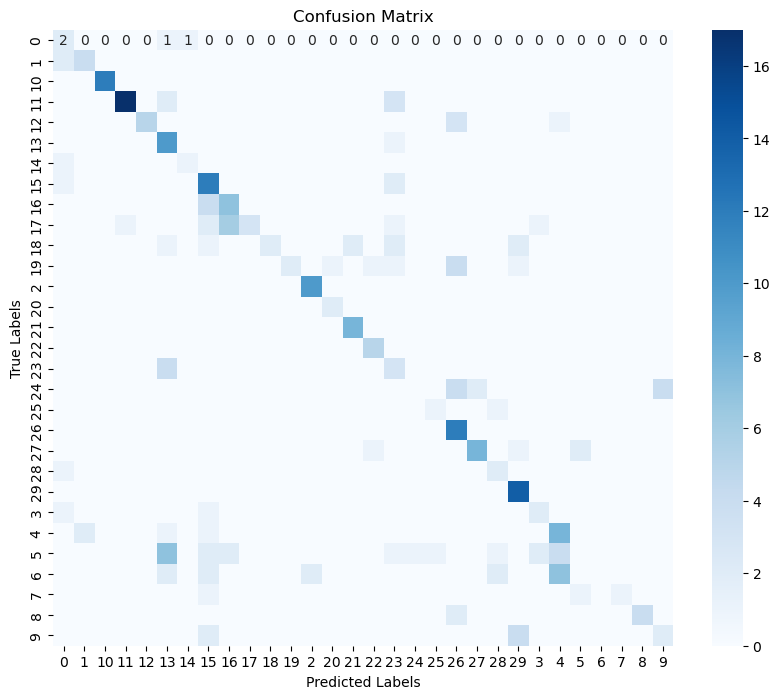

In [45]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

# Get the true labels and predicted labels for the validation or test set
true_labels = np.concatenate([y for x, y in data_test], axis=0)  # True labels
predictions = np.argmax(model.predict(data_test), axis=-1)  # Predicted labels

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=data_test.class_names, yticklabels=data_test.class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [26]:
from sklearn.metrics import classification_report

# Generate a classification report ( It includes precision, recall, and f1-score)
print(classification_report(true_labels, predictions, target_names=data_test.class_names))

              precision    recall  f1-score   support

           0       0.25      0.50      0.33         4
           1       0.67      0.67      0.67         6
          10       1.00      1.00      1.00        12
          11       0.94      0.77      0.85        22
          12       1.00      0.56      0.71         9
          13       0.36      0.91      0.51        11
          14       0.50      0.50      0.50         2
          15       0.43      0.80      0.56        15
          16       0.47      0.64      0.54        11
          17       1.00      0.21      0.35        14
          18       1.00      0.20      0.33        10
          19       1.00      0.20      0.33        10
           2       0.83      1.00      0.91        10
          20       0.67      1.00      0.80         2
          21       0.80      1.00      0.89         8
          22       0.71      1.00      0.83         5
          23       0.21      0.43      0.29         7
          24       0.00    

D:\Newfolder\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Newfolder\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Newfolder\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
import matplotlib.pyplot as plt

In [29]:
#Assigning the accuracies and losses into variables
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_acc) + 1)

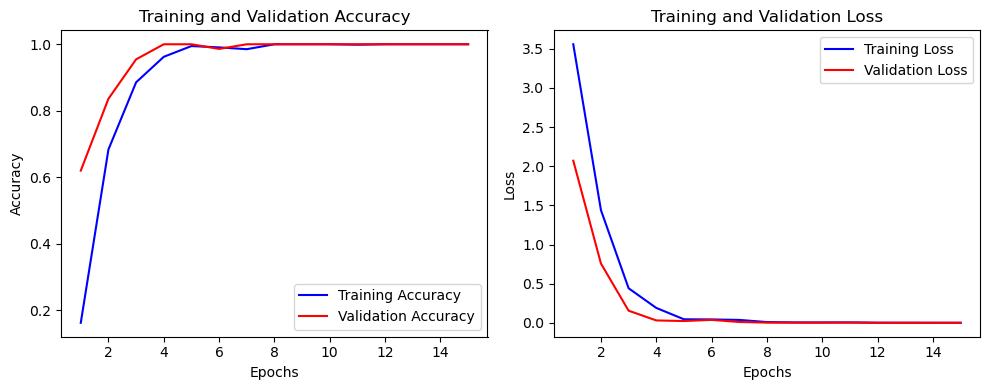

In [30]:
# Plotting Accuracy
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [32]:
#Trying to predict the class of image
image = '004_0004_j.png'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [33]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 750ms/step


In [34]:
score = tf.nn.softmax(predict)

Sign type in image is 4 with accuracy of 100.00


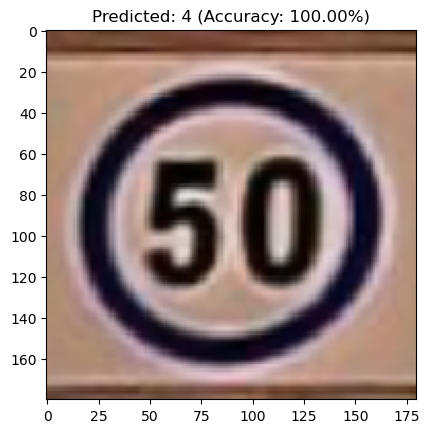

In [35]:
#Displaying the class name, accuracy and also the corresponding image
print('Sign type in image is {} with accuracy of {:0.2f}'.format(sign_type[np.argmax(score)],np.max(score)*100))
plt.imshow(image, cmap='gray')
plt.title('Predicted: {} (Accuracy: {:0.2f}%)'.format(sign_type[np.argmax(score)], np.max(score) * 100))
plt.show()

In [36]:
image = '010_0003_j.png'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [37]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


Sign type in image is 10 with accuracy of 100.00


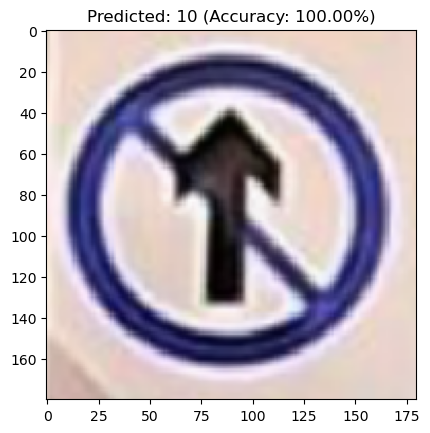

In [38]:
score = tf.nn.softmax(predict)
print('Sign type in image is {} with accuracy of {:0.2f}'.format(sign_type[np.argmax(score)],np.max(score)*100))
plt.imshow(image, cmap='gray')
plt.title('Predicted: {} (Accuracy: {:0.2f}%)'.format(sign_type[np.argmax(score)], np.max(score) * 100))
plt.show()

In [39]:
image = '022_0003_j.png'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [40]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Sign type in image is 22 with accuracy of 99.99


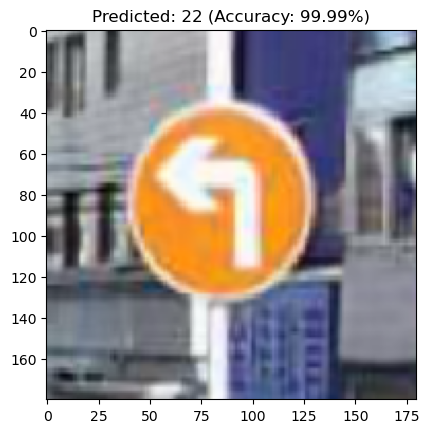

In [41]:
score = tf.nn.softmax(predict)
print('Sign type in image is {} with accuracy of {:0.2f}'.format(sign_type[np.argmax(score)],np.max(score)*100))
plt.imshow(image, cmap='gray')
plt.title('Predicted: {} (Accuracy: {:0.2f}%)'.format(sign_type[np.argmax(score)], np.max(score) * 100))
plt.show()